In [1]:
# Udacity's introduction to computer vision
import cv2 as cv
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from skimage import data, io, filters

In [5]:
# function to display the image in its original size
def imshow(image):
    dpi = mpl.rcParams['figure.dpi']
    height, width, _ = image.shape
    # compute the size the figure (in inches) to fit the image
    figsize = width/float(dpi), height/float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    # hide spines, ticks etc.
    ax.axis('off')
    # display the image
    ax.imshow(image)
    plt.show()

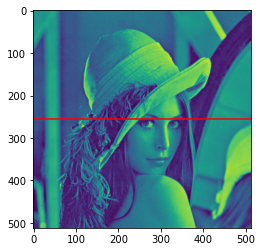

In [16]:
image = cv.imread('images/lena.png')
# convert from BGR to RGB
image = image[:, :, ::-1]
# get the green chaneel
image_green = image[:, :, 1]
# display the image
plt.imshow(image_green)
# plot a line across the centre of the image
plt.plot([0, 511], [255, 255], color='red')
plt.show()

In [ ]:
plt.plot(image_green[255, :])
plt.show()

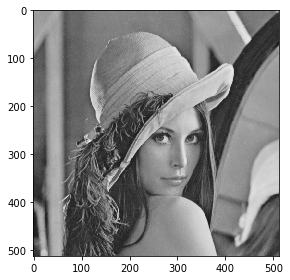

In [17]:
# convert image to grayscale
image_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
#print(image_gray)
#plt.imshow(image_gray, cmap='gray', vmin=0, vmax=255)
#plt.show()
io.imshow(image_gray, cmap='gray')
io.show()

In [ ]:
def scale(img, value):
    return np.uint8(np.clip(value * np.float32(img), 0, 255))
    #return np.uint8(value * np.float32(img))

In [ ]:
#print(image_gray)
test_image = np.uint8(np.clip(2 * np.float32(image_gray), 0, 255))
#print(test_image)

In [15]:
scaled_gray = scale(image_gray, 2)
#print(scaled_gray)
#plt.imshow(scaled_gray, cmap='gray', vmin=0, vmax=255)
#plt.show()
io.imshow(scaled_gray, cmap='gray')
io.imshow()

NameError: name 'scale' is not defined

In [ ]:
# scale green channel
#print(image_green)
scaled_green = scale(image_green, 2.5)
#print(scaled_green)
plt.imshow(scaled_green)
plt.show()

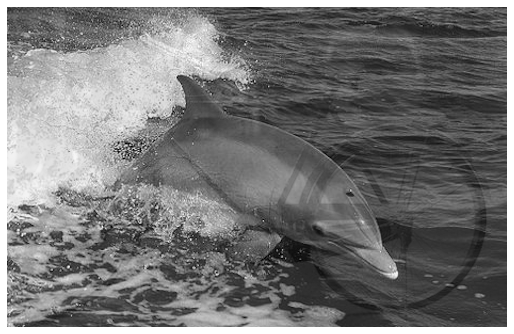

In [6]:
# blend two images
dolphin = cv.imread('images/dolphin.png')
bicycle = cv.imread('images/bicycle.png')
result = np.uint8(0.85 * np.float32(dolphin)) + np.uint8(0.15 * np.float32(bicycle))
imshow(result)

In [ ]:
# write a blend function
def blend(image_1, image_2, alpha):
    return scale(image_1, alpha) + scale(image_2, (1 - alpha))

In [ ]:
blended_images = blend(dolphin, bicycle, 0.25)
imshow(blended_images)

In [ ]:
# Gaussian Noise
peppers = cv.imread('images/peppers.png')
peppers = peppers[:, :, ::-1]
height, width, channel = peppers.shape
sigma = 2
mu = 0
noise = sigma * np.random.randn(height, width, channel)
#noise = np.random.normal(mu, sigma, peppers.shape)
#print(noise)
output = np.uint8(peppers + noise)
imshow(output)

In [ ]:
# gaussian noise function
def gaussian_noise(image, mu, sigma):
    noise = np.random.normal(mu, sigma, image)
    return np.uint8(image + noise)

In [ ]:
def image_diff(image1, image2):
    return np.uint8(abs(np.float32(image1) - np.float32(image2)))

In [ ]:
diff1 = image_diff(bicycle, dolphin)
diff2 = image_diff(dolphin, bicycle)
imshow(diff1)
imshow(diff2)

## Generate Gaussian Noise

In [ ]:
noise = np.random.randn(1, 10000)
bins = np.linspace(-3, 3, 21)
hist, bin_edges = np.histogram(noise, bins=np.hstack((bins, np.inf)))
print(np.vstack((bin_edges[:-1], hist)))

In [ ]:
plt.plot(bin_edges[:-1], hist)

## Effect of sigma on Gaussian noise

In [8]:
print(dolphin.shape)
# convert to grayscale image
dolphin_gray = cv.cvtColor(dolphin, cv.COLOR_RGB2GRAY)
print(dolphin_gray.shape)
#print(dolphin)
height, width = dolphin_gray.shape

(320, 500, 3)
(320, 500)


In [55]:
def unity_normalize(image):
    min_pixel = np.amin(image)
    max_pixel = np.amax(image)
    return (image - min_pixel) / (max_pixel - min_pixel)

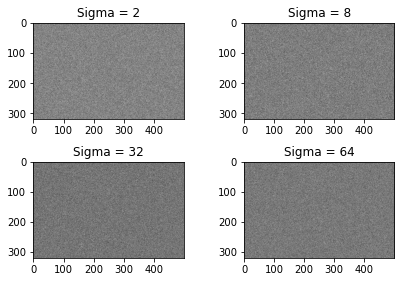

In [18]:
dolphin = cv.imread('images/dolphin.png', 0)
height, width = dolphin.shape

sigmas = [2, 8, 32, 64]

fig = plt.figure()

for i, sigma in enumerate(sigmas, start=1):
    noise = np.random.randn(height, width) * sigma
    cv.normalize(noise, noise, 0, 255, cv.NORM_MINMAX, dtype=-1)
    ax = fig.add_subplot(2, 2, i)
    ax.imshow(noise, cmap='gray')
    ax.set_title('Sigma = {sigma}'.format(sigma=sigma))
    cv.imwrite('sigma_{0}.png'.format(sigma), noise)
plt.tight_layout() # used to fit plots within a figure cleanly
plt.show()

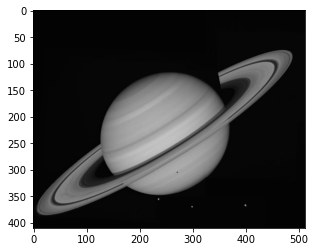

In [20]:
saturn = cv.imread('images/saturn.png')
plt.imshow(saturn)
plt.show()

In [40]:
print(saturn.shape)

(410, 512, 3)


In [63]:
height, width, channel = saturn.shape
noise = np.random.randn(height, width, channel) * 100
output = saturn + noise
print(output)

[[[  24.41680248   26.17823095 -188.00011895]
  [ 161.28670234  -22.8189638    36.24705954]
  [ -31.61233611 -165.88357185  149.78006971]
  ...
  [ -92.66610358 -112.92427965   71.10431425]
  [  71.62319786  -11.05438193   31.34628993]
  [ -16.931404     56.79842451  -55.43309732]]

 [[ -29.14220921  103.80445973   64.67650929]
  [ 164.23132025   66.974777     77.47558185]
  [  12.56618214  -13.71910543 -163.2306896 ]
  ...
  [ -35.63179288   60.3153453   -16.9974723 ]
  [-179.94613418  -65.69598218  -88.89702052]
  [  89.64031872   15.3413655   -86.65893052]]

 [[-116.80793473   59.33275171    9.84759414]
  [  77.55158755   -4.00581189  -49.55450058]
  [ -61.47873346   27.97526629   44.75166448]
  ...
  [  90.79144444   99.15350583   28.70911672]
  [  92.29893257  -50.21844809  -71.87313514]
  [-122.87298005  100.82084046  -63.06644265]]

 ...

 [[ 104.92145127  208.41781188  214.28432784]
  [  19.88552512  -33.26646124 -143.76275103]
  [ -12.26523494  -20.89826259   57.5261696 ]
  ..

In [64]:
print(np.amin(output))
print(np.amax(output))

-446.8821258105713
582.140363765574


In [65]:
normalized_output = unity_normalize(output)

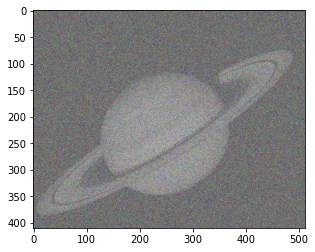

In [66]:
plt.imshow(normalized_output, cmap='gray')
plt.show()

1.0
